In [66]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

In [33]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

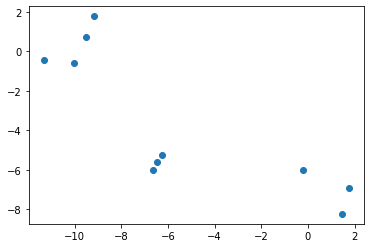

In [34]:
X, true_labels = make_blobs(10,2, centers=3, random_state=9)
plt.scatter(X[:,0],X[:,1])

Starting with low number of data points

trying a dictionary approcah where keys are the cluster ids and the values are the centers of the clusters

In [127]:
cluster_dict = {str(i):x for i,x in enumerate(X)}

In [128]:
cluster_dict

{'0': array([-10.0331975 ,  -0.61045562]),
 '1': array([-0.22165915, -6.02583041]),
 '2': array([-9.15662584,  1.77760915]),
 '3': array([-9.4958347,  0.7449955]),
 '4': array([-6.6414108 , -5.98406595]),
 '5': array([-6.48250712, -5.59686837]),
 '6': array([ 1.45819549, -8.22413059]),
 '7': array([ 1.73828163, -6.89264039]),
 '8': array([-11.3098481 ,  -0.45338014]),
 '9': array([-6.23963239, -5.24831702])}

## for now we will try only three methods

### #1 - Single linkage where the minimum distance is considered with a cluster
### #2 - Complete linkage where the maximum distance is conidered 
### #3 - Average linkage where the average distance is considered

In [129]:
def euclidean_dis(point1, point2):
    return (((point1-point2)**2).sum())**0.5

In [130]:
def get_dist_matrix(X):
    dist_matrix = np.full((X.shape[0],X.shape[0]),np.nan)
    for (i,i_val),(j,j_val) in combinations(cluster_dict.items(),2):
        i,j = int(i), int(j)
        if i==j:
            dist_matrix[i,j] = np.nan
        else:
            dist_matrix[i,j] = euclidean_dis(i_val,j_val)
    return dist_matrix

    
def get_min_index(dist_matrix):
    return np.unravel_index(np.nanargmin(dist_matrix), dist_matrix.shape)

In [221]:
def update_cluster(cluster_dict, dist_matrix = None):
    if type(dist_matrix) == type(np.zeros((1,1))):
        
        index_to_cluster = dict()
        for i in cluster_dict.keys():
#             print(i)
            cluster_dict[i] = dist_matrix[int(i)]
            index_to_cluster[int(i)] = i
    
        return cluster_dict, index_to_cluster
    
    else:
        dist_matrix = np.stack([*cluster_dict.values()])
        i,j = get_min_index(dist_matrix)
        
        cluster_dict

In [222]:
cluster_dict, index_to_cluster = update_cluster(cluster_dict,dist_matrix)

In [225]:
index_to_cluster

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

In [224]:
pd.DataFrame(np.stack([*cluster_dict.values()]))

,0,1,2,3,4,5,6,7,8,9
0,NaN,11.206809,2.543861,1.458083,6.354518,6.121414,13.784780,13.342922,1.286277,5.991736
1,NaN,NaN,11.862854,11.482788,6.419888,6.275526,2.766665,2.143065,12.409679,6.067992
2,NaN,NaN,NaN,1.086901,8.159038,7.844350,14.584554,13.923801,3.100593,7.607397
3,NaN,NaN,NaN,NaN,7.309446,7.021352,14.157542,13.584508,2.174109,6.820751
4,NaN,NaN,NaN,NaN,NaN,0.418536,8.403661,8.428805,7.237596,0.838303
5,NaN,NaN,NaN,NaN,NaN,NaN,8.364046,8.322283,7.053984,0.424825
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360630,14.946822,8.253001
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.550524,8.145607
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.978432
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
type(dist_matrix)

numpy.ndarray

<AxesSubplot:>

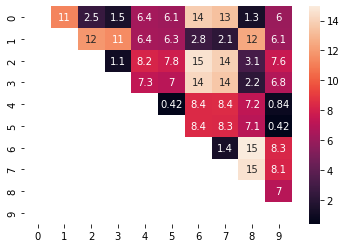

In [132]:
sns.heatmap(pd.DataFrame(dist_matrix),annot=True)

<AxesSubplot:>

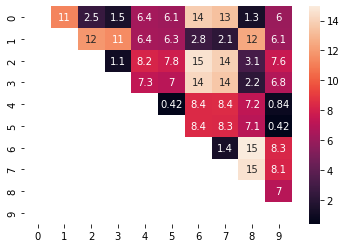

In [140]:
dist_matrix2 = dist_matrix.copy()
sns.heatmap(pd.DataFrame(dist_matrix2),annot=True)

In [141]:
dist_matrix2[4] = dist_matrix2[5] = np.nanmin((dist_matrix2[4],dist_matrix2[5]), axis = 0)
dist_matrix2[:,4] = dist_matrix2[:,5] = np.nanmin((dist_matrix2[:,4],dist_matrix2[:,5]), axis = 0)

/var/folders/l4/tfnrkckd1mj12_lf97sckpfc0000gn/T/ipykernel_788/1967860933.py:1: RuntimeWarning: All-NaN axis encountered
  dist_matrix2[4] = dist_matrix2[5] = np.nanmin((dist_matrix2[4],dist_matrix2[5]), axis = 0)
/var/folders/l4/tfnrkckd1mj12_lf97sckpfc0000gn/T/ipykernel_788/1967860933.py:2: RuntimeWarning: All-NaN axis encountered
  dist_matrix2[:,4] = dist_matrix2[:,5] = np.nanmin((dist_matrix2[:,4],dist_matrix2[:,5]), axis = 0)


In [174]:
np.nanmean((dist_matrix2[4],dist_matrix2[5]), axis = 0)

/var/folders/l4/tfnrkckd1mj12_lf97sckpfc0000gn/T/ipykernel_788/671297507.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean((dist_matrix2[4],dist_matrix2[5]), axis = 0)


array([       nan,        nan,        nan,        nan, 0.41853595,
       0.41853595, 8.36404596, 8.32228291, 7.05398413, 0.42482488])

<AxesSubplot:>

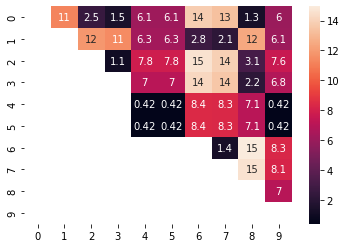

In [142]:
sns.heatmap(pd.DataFrame(dist_matrix2),annot=True)

In [101]:
# index 4, 5 has the smallest distance value with a value of 0.418
get_min_index(dist_matrix)

(4, 5)

<AxesSubplot:>

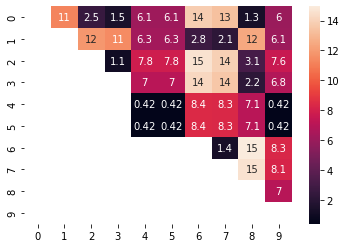

In [144]:
sns.heatmap(pd.DataFrame(dist_matrix2),annot=True)

In [145]:
i,j = get_min_index(dist_matrix)

In [146]:
i,j

(4, 5)

In [166]:
pd.DataFrame(np.delete(dist_matrix2, j,1))

,0,1,2,3,4,5,6,7,8
0,NaN,11.206809,2.543861,1.458083,6.121414,13.784780,13.342922,1.286277,5.991736
1,NaN,NaN,11.862854,11.482788,6.275526,2.766665,2.143065,12.409679,6.067992
2,NaN,NaN,NaN,1.086901,7.844350,14.584554,13.923801,3.100593,7.607397
3,NaN,NaN,NaN,NaN,7.021352,14.157542,13.584508,2.174109,6.820751
4,NaN,NaN,NaN,NaN,0.418536,8.364046,8.322283,7.053984,0.424825
5,NaN,NaN,NaN,NaN,0.418536,8.364046,8.322283,7.053984,0.424825
6,NaN,NaN,NaN,NaN,NaN,NaN,1.360630,14.946822,8.253001
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.550524,8.145607
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.978432
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
def delete_row_col(dist_matrix, row, col):
    return np.delete(np.delete(dist_matrix, col,1),row,0)

In [169]:
row = col = 5
a = delete_row_col(dist_matrix2,row,col)
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8
0,NaN,11.206809,2.543861,1.458083,6.121414,13.784780,13.342922,1.286277,5.991736
1,NaN,NaN,11.862854,11.482788,6.275526,2.766665,2.143065,12.409679,6.067992
2,NaN,NaN,NaN,1.086901,7.844350,14.584554,13.923801,3.100593,7.607397
3,NaN,NaN,NaN,NaN,7.021352,14.157542,13.584508,2.174109,6.820751
4,NaN,NaN,NaN,NaN,0.418536,8.364046,8.322283,7.053984,0.424825
5,NaN,NaN,NaN,NaN,NaN,NaN,1.360630,14.946822,8.253001
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.550524,8.145607
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.978432
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9
0,NaN,11.206809,2.543861,1.458083,6.121414,6.121414,13.784780,13.342922,1.286277,5.991736
1,NaN,NaN,11.862854,11.482788,6.275526,6.275526,2.766665,2.143065,12.409679,6.067992
2,NaN,NaN,NaN,1.086901,7.844350,7.844350,14.584554,13.923801,3.100593,7.607397
3,NaN,NaN,NaN,NaN,7.021352,7.021352,14.157542,13.584508,2.174109,6.820751
4,NaN,NaN,NaN,NaN,0.418536,0.418536,8.364046,8.322283,7.053984,0.424825
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360630,14.946822,8.253001
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.550524,8.145607
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.978432
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
b = np.delete(a, 0,i)
pd.DataFrame(b)

AxisError: axis 4 is out of bounds for array of dimension 2

In [143]:
# updating the original cluster dict so that each key corresponds to the index in the distance matrix
for i in cluster_dict.keys():
    cluster_dict[i] = int(i)

In [175]:
i,j

(4, 5)

In [176]:
cluster_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
def merge_clusters(dist_matrix, dist_type):
    i,j = get_min_index(dist_matrix)
    
    if dist_type = "single":
        # Take the minimum values of both the clusters and take the 'min' value
        dist_matrix[i] = dist_matrix[j] = np.nanmin((dist_matrix[i],dist_matrix[j]), axis = 0)
        dist_matrix[:,i] = dist_matrix[:,j] = np.nanmin((dist_matrix[:,i],dist_matrix[:,j]), axis = 0)
        
    elif dist_type = "complete":
        # Take the minimum values of both the clusters and take the 'max' value
        dist_matrix[i] = dist_matrix[j] = np.nanmax((dist_matrix[i],dist_matrix[j]), axis = 0)
        dist_matrix[:,i] = dist_matrix[:,j] = np.nanmax((dist_matrix[:,i],dist_matrix[:,j]), axis = 0)
        
    else:
        # Take the minimum values of both the clusters and take the 'avg' value
        dist_matrix[i] = dist_matrix[j] = np.nanmean((dist_matrix[i],dist_matrix[j]), axis = 0)
        dist_matrix[:,i] = dist_matrix[:,j] = np.nanmean((dist_matrix[:,i],dist_matrix[:,j]), axis = 0)        

    dist_matrix[i,i] = np.nan
    
    
    

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [171]:
dist_matrix2[i,i] = np.nan

In [172]:
pd.DataFrame(dist_matrix2)

,0,1,2,3,4,5,6,7,8,9
0,NaN,11.206809,2.543861,1.458083,6.121414,6.121414,13.784780,13.342922,1.286277,5.991736
1,NaN,NaN,11.862854,11.482788,6.275526,6.275526,2.766665,2.143065,12.409679,6.067992
2,NaN,NaN,NaN,1.086901,7.844350,7.844350,14.584554,13.923801,3.100593,7.607397
3,NaN,NaN,NaN,NaN,7.021352,7.021352,14.157542,13.584508,2.174109,6.820751
4,NaN,NaN,NaN,NaN,NaN,0.418536,8.364046,8.322283,7.053984,0.424825
5,NaN,NaN,NaN,NaN,0.418536,0.418536,8.364046,8.322283,7.053984,0.424825
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360630,14.946822,8.253001
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.550524,8.145607
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.978432
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
